# Projet IA: Proposer un modèle qui, à partir de l'image du vêtement, peut déterminer la présence ou non d'une matière polluante

# Modèle N°1

Pour une question de capacité d'ordinateur, le dataset initial a été séparé de façon aléatoire et est composé de 2143 images

## Librairies

In [1]:
import cv2
import os
import xml.etree.ElementTree as ET
from PIL import Image

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [4]:
from torch.nn import functional as F

In [5]:
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Dataset

In [6]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

## Importation image + filenamne 

In [7]:
folder_path = "/Users/jade/Desktop/Cours_M2 S2/projet IA/untitled folder 2/images"

In [8]:
# Initialisation d'une liste vide pour stocker les images
image_train1 = []


In [9]:
# Boucle sur tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    # Vérifie si le fichier est un fichier
    if os.path.isfile(os.path.join(folder_path, filename)) and filename.endswith(".png") :
        # Charge l'image et l'ajoute à la liste
        img = cv2.imread(os.path.join(folder_path, filename))
        image_train1.append((filename, img))
        

In [10]:
for filename, img in image_train1:
    # Convertit l'image en RGB car OpenCV utilise BGR par défaut
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Affiche l'image
    #plt.imshow(img_rgb)
   # plt.title(filename)
   # plt.show()

In [11]:
# Affiche le nombre d'images dans la liste
if len(image_train1) == 2143 :
    print(f"Le nombre d'images est de {len(image_train1)}, ce qui correspond à notre dataset dans son intégralité ")
elif len(image_train1) < 2143:
    print(f"Le nombre d'images est de {len(image_train1)}, toutes les images ne sont pas intégrées")
else :
    print(f"Le nombre d'images est de {len(image_train1)}, trop d'images ont été intégrées")

Le nombre d'images est de 2143, ce qui correspond à notre dataset dans son intégralité 


In [12]:
# Affiche le nom de chaque image dans la liste
#for filename, img in image_train1:
    #print()

In [13]:
image_train = []

for filename, img in image_train1:
    newlargeur = 224
    newhauteur = 224
    img_resized = cv2.resize(img, (newlargeur, newhauteur))
    image_train.append((filename, img_resized))

In [14]:
print(len(image_train))

2143


In [15]:
#for i in image_train:
    #filename, img = i
    #print(filename + str(img.shape))

# Image_train exctraction uniquement nom

In [16]:
# Initialisation d'une liste vide pour stocker les images
image_nom= []


In [17]:
# Boucle sur tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    # Vérifie si le fichier est un fichier
    if os.path.isfile(os.path.join(folder_path, filename)) and filename.endswith(".png") :
        # Charge l'image et l'ajoute à la liste
        img = cv2.imread(os.path.join(folder_path, filename))
        image_nom.append((filename))        

In [18]:
print(len(image_nom))

2143


# Ajout matière polluante

In [19]:
data = pd.read_csv("sales.csv")

In [20]:
data

,Unnamed: 0,external_code,retail,season,category,color,image_path,fabric,release_date,restock,...,2,3,4,5,6,7,8,9,10,11
0,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,...,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,15,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,32,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,26,...,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106845,106845,5504,51,AW19,medium coat,grey,AI19/05504.png,foam rubber,2019-12-30,12,...,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106846,106846,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,12,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
106847,106847,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,...,0.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0
106848,106848,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,1,...,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
liste_polluant= ['acrylic','georgette', 'nylon','dark jeans','light jeans', 'heavy jeans','faux leather', 'fluid polyviscous', 'polyviscous','paillettes' ]


In [22]:
liste_ok = data['fabric'].unique().copy()

In [23]:
liste_polluant

['acrylic',
 'georgette',
 'nylon',
 'dark jeans',
 'light jeans',
 'heavy jeans',
 'faux leather',
 'fluid polyviscous',
 'polyviscous',
 'paillettes']

In [24]:
liste_non_polluant = np.setdiff1d(liste_ok, liste_polluant)

In [25]:
liste_non_polluant 

array(['angora', 'bengaline', 'cady', 'chambree', 'chanel', 'chine crepe',
       'cloth', 'cotton', 'crepe', 'dainetto', 'devore', 'embossed',
       'flamed', 'fluid', 'foam rubber', 'frise', 'fur', 'goose', 'hron',
       'ity', 'jacquard', 'lace', 'linen', 'lurex', 'macrame', 'marocain',
       'matte jersey', 'milano stitch', 'mohair', 'muslin cotton or silk',
       'mutton', 'nice', 'ottoman', 'piquet', 'plisse', 'plumetis',
       'plush', 'satin cotton', 'scottish', 'scuba crepe', 'shiny jersey',
       'silky satin', 'tactel', 'technical', 'tencel', 'tulle', 'velvet',
       'viscose twill', 'webbing'], dtype=object)

In [26]:
# Créez une colonne booléenne qui vaut True si la matière est dans la liste des matières polluantes
data['matiere_polluante'] = data['fabric'].isin(liste_polluant)

# Convertissez la colonne booléenne en une colonne d'entiers (0 pour False, 1 pour True)
data['matiere_polluante'] = data['matiere_polluante'].astype(int)

In [27]:
print(data['matiere_polluante'].value_counts())

0    75030
1    31820
Name: matiere_polluante, dtype: int64


In [28]:
count = 0
for fabric in data['fabric']:
    if fabric in liste_polluant:
        count += 1
print(count)

31820


In [29]:
df = data.drop(['Unnamed: 0','external_code', 'retail', 'season', 'category', 'color','release_date', 'restock','fabric', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], axis=1)

In [30]:
df['matiere_polluante'] = data['matiere_polluante'].astype(str)

In [31]:
# extraire les noms de fichiers
new_paths = []
for path in df['image_path']:
    #new_path = path.split('/')[-1].split('.')[0]
    new_path = path.split('/')[-1]
    new_paths.append(new_path)

# remplacer la colonne image_path par les nouveaux noms de fichiers extraits
df['image_path'] = new_paths

In [32]:
#df.head()

In [33]:
df['color']=data['color']

In [34]:
#df.head()

In [35]:
print(len(df))

106850


In [36]:
def sup_lignes_en_double(df):
    return df.drop_duplicates(subset=['image_path'], keep='first')

df=sup_lignes_en_double(df)
#df.head()

## fusion df / image_nom 
pour obtenir seulement les lignesavec une correspondance dans les images

In [37]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [38]:
print(image_nom[:5])

['03188.png', '02296.png', '01953.png', '02282.png', '04195.png']


In [39]:
image_noms = pd.DataFrame(image_nom, columns=['image_path'])

In [40]:
#image_noms.head()

In [41]:
print(type(image_nom))

<class 'list'>


In [42]:
image_nom_df = pd.DataFrame({'image_path': image_nom})
resultat = pd.merge(df, image_nom_df, on='image_path', how='inner')

In [43]:
print(len(image_nom_df))

2143


In [44]:
#resultat.head()

In [45]:
print(len(resultat))

2143


In [46]:
set(image_nom) == set(resultat['image_path'])
# par extension, même nombre de fichiers dans image_train et resultat 

True

In [47]:
label = resultat['matiere_polluante']
#print(label)

In [48]:
print(len(label))
print(type(label))

2143
<class 'pandas.core.series.Series'>


In [49]:
# 1 = matière polluante
# 0 = matière ok 

## Transformation en Pyspark
Pour utiliser un modèle cnn avec PyTorch, les données doivent être en format torch

In [50]:
print(type(image_train))
print(len(image_train))

<class 'list'>
2143


In [51]:
print(type(label))
print(len(label))

<class 'pandas.core.series.Series'>
2143


In [52]:
#for i in image_train:
    #filename, img = i
    #print(filename + str(img.shape))
    #02296.png(224, 224, 3)

In [53]:
image_train_tensor = torch.stack([torch.tensor(t[1]) for t in image_train])

In [54]:
label_dict = {label: i for i, label in enumerate(set(label))}
label_array = np.array([label_dict[label] for label in label], dtype=np.int32)
labels_train_tensor = torch.tensor(label_array)

In [55]:
#Séparation des données en deux, un pour l'entrainement et un pour le test
X_train, X_test, y_train, y_test = train_test_split(image_train_tensor, labels_train_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [56]:
print(len(train_dataset))
print(type(train_dataset))

1714
<class 'torch.utils.data.dataset.TensorDataset'>


In [57]:
print(len(test_dataset))
print(type(test_dataset))

429
<class 'torch.utils.data.dataset.TensorDataset'>


# Définition du Modèle  - hyperparamètres - fonction de perte - optimisateur

In [58]:
# Le modele
class PolluantClassifier(nn.Module):
    def __init__(self):
        super(PolluantClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 56 * 56, 256)
        self.fc2 = nn.Linear(256, 2)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.reshape(-1, 32 * 56 * 56)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

In [59]:
# Les hyperparamètres qui ont un rôle principal dans le bon fonctionnement du modèle
batch_size = 64   
learning_rate = 0.01   
num_epochs = 10   


In [60]:
# Instanciation du modèle, de la fonction de perte et de l'optimiseur
model = PolluantClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [61]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [62]:
# Entraîner le modèle
for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images = images.float().permute(0, 3, 1, 2)
        outputs = model(images)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels_train_tensor.size(0)
        train_correct += (predicted == labels).sum().item()
    train_accuracy = train_correct / train_total
    train_loss /= len(train_loader)
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.4f}'.format(epoch+1, num_epochs, train_loss, train_accuracy))


Epoch [1/10], Train Loss: 57.3041, Train Accuracy: 0.0172
Epoch [2/10], Train Loss: 0.6635, Train Accuracy: 0.0215
Epoch [3/10], Train Loss: 0.6163, Train Accuracy: 0.0215
Epoch [4/10], Train Loss: 0.5964, Train Accuracy: 0.0215
Epoch [5/10], Train Loss: 0.5871, Train Accuracy: 0.0215
Epoch [6/10], Train Loss: 0.5875, Train Accuracy: 0.0215
Epoch [7/10], Train Loss: 0.5790, Train Accuracy: 0.0215
Epoch [8/10], Train Loss: 0.5836, Train Accuracy: 0.0215
Epoch [9/10], Train Loss: 0.5804, Train Accuracy: 0.0215
Epoch [10/10], Train Loss: 0.5751, Train Accuracy: 0.0215


In [63]:
# sauvegarde du modèle
#PATH = "/Users/jade/Desktop/Cours_M2 S2/projet IA/my_model.pt"
#torch.save(model.state_dict(), PATH)

# Test du modèle avec la partie train du dataset

In [64]:
# Chargement du modèle
model = PolluantClassifier()
PATH = "/Users/jade/Desktop/Cours_M2 S2/projet IA/my_model.pt"
model.load_state_dict(torch.load(PATH))
model.eval()

PolluantClassifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

In [65]:
# Mettre le modèle en mode d'évaluation
model.eval()

PolluantClassifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

In [66]:
# Test du modèle
test_loader = DataLoader(test_dataset, batch_size=batch_size)

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.float().permute(0, 3, 1, 2)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += len(labels)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.716


# Résultats notables

batch_size = 64   
learning_rate = 0.001  
num_epochs = 10   
 
Accuracy on test set: 0.699

batch_size = 64   
learning_rate = 0.01   
num_epochs = 10   


Accuracy on test set: 0.716 

batch_size = 32  
learning_rate = 0.001  
num_epochs = 10  

Accuracy on test set: 0.699

# Test avec une image provenant de google 

In [67]:
# Image en question
image_path = "/Users/jade/Desktop/Cours_M2 S2/projet IA/untitled folder 2/s-l500.jpg"
image = Image.open(image_path)


In [68]:
# Transformer l'image en tenseur PyTorch car condition de fonctionnement du modèle 
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image_tensor = transform(image)

In [69]:
# Image dans le modèle 
model.eval()
with torch.no_grad():
    output = model(image_tensor.unsqueeze(0))
    probs = torch.softmax(output, dim=1)

In [70]:
# La prédiction
classes = ["0", "1"]
_, predicted = torch.max(probs.data, 1)
class_name = classes[predicted.item()]
prob_percentage = probs.data[0][predicted.item()] * 100.0
if predicted.item() == 0:
    print(f"Prédiction: {class_name}, donc le vêtement ne contiendrait pas une des matières polluantes désignées, Probabilité: {prob_percentage:.2f}%")
else:
    print(f"Prédiction: {class_name}, donc le vêtement contiendrait une des matières polluantes désignées, Probabilité: {prob_percentage:.2f}%")

Prédiction: 1, donc le vêtement contiendrait une des matières polluantes désignées, Probabilité: 92.79%


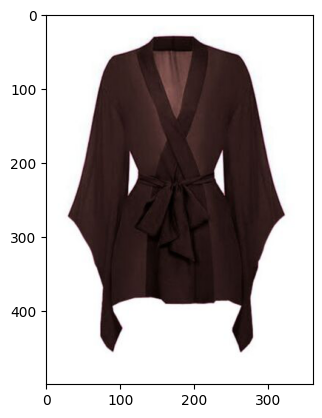

In [71]:
plt.imshow(image)   
plt.show()

In [72]:
# Image en question
image_path = "/Users/jade/Desktop/Cours_M2 S2/projet IA/untitled folder 2/vest jean.jpg"
image = Image.open(image_path)


In [73]:
# Transformer l'image en tenseur PyTorch car condition de fonctionnement du modèle 
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image_tensor = transform(image)

In [74]:
# Image dans le modèle 
model.eval()
with torch.no_grad():
    output = model(image_tensor.unsqueeze(0))
    probs = torch.softmax(output, dim=1)

In [75]:
# La prédiction
classes = ["0", "1"]
_, predicted = torch.max(probs.data, 1)
class_name = classes[predicted.item()]
prob_percentage = probs.data[0][predicted.item()] * 100.0
if predicted.item() == 0:
    print(f"Prédiction: {class_name}, donc le vêtement ne contiendrait pas une des matières polluantes désignées, Probabilité: {prob_percentage:.2f}%")
else:
    print(f"Prédiction: {class_name}, donc le vêtement contiendrait des matières polluantes désignées, Probabilité: {prob_percentage:.2f}%")

Prédiction: 1, donc le vêtement contiendrait des matières polluantes désignées, Probabilité: 92.78%


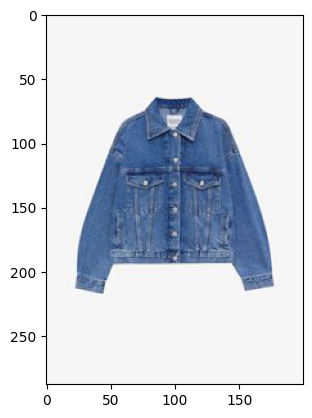

In [76]:
plt.imshow(image)   
plt.show()

# Traitement d'image - Modèle N°2

In [24]:
import pandas as pd              #analyse de donnees
import numpy as np               #manipulation de tableaux ou calcul mathematiques
import seaborn as sns            #visualisation de donnees
import matplotlib.pyplot as plt  #visualisation les données
import statsmodels.api as sm

In [25]:
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator


In [26]:
data = pd.read_csv("C:/Users/nico_/Desktop/IA School M2/Fast Fashion/visuelle2/sales.csv")

# Création d'une matière polluante

In [27]:
liste_polluant= ['acrylic','georgette', 'nylon','dark jeans','light jeans', 'heavy jeans','faux leather', 'fluid polyviscous', 'polyviscous','paillettes' ]


In [28]:
liste_ok = data['fabric'].unique().copy()

In [29]:
liste_polluant

['acrylic',
 'georgette',
 'nylon',
 'dark jeans',
 'light jeans',
 'heavy jeans',
 'faux leather',
 'fluid polyviscous',
 'polyviscous',
 'paillettes']

In [30]:
liste_non_polluant = np.setdiff1d(liste_ok, liste_polluant)

In [31]:
liste_non_polluant 

array(['angora', 'bengaline', 'cady', 'chambree', 'chanel', 'chine crepe',
       'cloth', 'cotton', 'crepe', 'dainetto', 'devore', 'embossed',
       'flamed', 'fluid', 'foam rubber', 'frise', 'fur', 'goose', 'hron',
       'ity', 'jacquard', 'lace', 'linen', 'lurex', 'macrame', 'marocain',
       'matte jersey', 'milano stitch', 'mohair', 'muslin cotton or silk',
       'mutton', 'nice', 'ottoman', 'piquet', 'plisse', 'plumetis',
       'plush', 'satin cotton', 'scottish', 'scuba crepe', 'shiny jersey',
       'silky satin', 'tactel', 'technical', 'tencel', 'tulle', 'velvet',
       'viscose twill', 'webbing'], dtype=object)

In [32]:
# Créez une colonne booléenne qui vaut True si la matière est dans la liste des matières polluantes
data['matiere_polluante'] = data['fabric'].isin(liste_polluant)

# Convertissez la colonne booléenne en une colonne d'entiers (0 pour False, 1 pour True)
data['matiere_polluante'] = data['matiere_polluante'].astype(int)

In [33]:
print(data['matiere_polluante'].value_counts())

0    75030
1    31820
Name: matiere_polluante, dtype: int64


In [34]:
count = 0
for fabric in data['fabric']:
    if fabric in liste_polluant:
        count += 1
print(count)

31820


In [35]:
df = data.drop(['Unnamed: 0','external_code', 'retail', 'season', 'category', 'color','release_date', 'restock','fabric', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], axis=1)

In [36]:
df['matiere_polluante'] = df['matiere_polluante'].astype(str)

In [37]:
df.head()

,image_path,matiere_polluante
0,PE17/00005.png,1
1,PE17/00002.png,1
2,PE17/00005.png,1
3,PE17/00009.png,0
4,PE17/00005.png,1


In [38]:
# extraire les noms de fichiers
new_paths = []
for path in df['image_path']:
    #new_path = path.split('/')[-1].split('.')[0]
    new_path = path.split('/')[-1]
    new_paths.append(new_path)

# remplacer la colonne image_path par les nouveaux noms de fichiers extraits
df['image_path'] = new_paths

In [39]:
df.head()

,image_path,matiere_polluante
0,00005.png,1
1,00002.png,1
2,00005.png,1
3,00009.png,0
4,00005.png,1


# Je ne prends que les 1000 premières photos

In [40]:
import os


# Définition des chemins d'accès aux images
image_dir = r'C:\Users\nico_\Desktop\IA School M2\Fast Fashion\visuelle2\images\images1000'

# Liste de tous les fichiers dans le répertoire d'images
all_files = os.listdir(image_dir)

# Liste des fichiers dans le dataframe
df_files = df['image_path'].tolist()

# Vérification des fichiers manquants
missing_files = []
for file in df_files:
    if file not in all_files:
        missing_files.append(file)
# Suppression des lignes correspondantes dans le dataframe
df = df[~df['image_path'].isin(missing_files)]


In [41]:
df.isnull().sum()

image_path           0
matiere_polluante    0
dtype: int64

In [42]:
df.duplicated().sum()

13000

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

0

In [45]:
df.shape

(946, 2)

In [46]:
# Définition des chemins d'accès aux images
image_dir = r'C:\Users\nico_\Desktop\IA School M2\Fast Fashion\visuelle2\images\images1000'

# Division des données en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Configuration du générateur d'images
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Chargement des images à partir du générateur
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="image_path",
    y_col="matiere_polluante",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="image_path",
    y_col="matiere_polluante",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

# Chargement du modèle VGG16 sans la dernière couche fully-connected
base_model = VGG16(weights="imagenet", include_top=False)

# Ajout d'une nouvelle couche fully-connected pour la classification binaire
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

# Définition du modèle final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation du modèle
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entraînement du modèle
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Found 756 validated image filenames belonging to 2 classes.
Found 190 validated image filenames belonging to 2 classes.
Epoch 1/10
23/23 [==============================] - 742s 32s/step - loss: 4.4980 - accuracy: 0.6616 - val_loss: 0.6891 - val_accuracy: 0.7500
Epoch 2/10
23/23 [==============================] - 822s 35s/step - loss: 0.6016 - accuracy: 0.7666 - val_loss: 0.5948 - val_accuracy: 0.7437
Epoch 3/10
23/23 [==============================] - 780s 34s/step - loss: 0.5677 - accuracy: 0.7652 - val_loss: 0.5971 - val_accuracy: 0.7437
Epoch 4/10
23/23 [==============================] - 766s 33s/step - loss: 0.5505 - accuracy: 0.7666 - val_loss: 0.5919 - val_accuracy: 0.7500
Epoch 5/10
23/23 [==============================] - 793s 34s/step - loss: 0.5950 - accuracy: 0.7624 - val_loss: 0.6520 - val_accuracy: 0.7375
Epoch 6/10
23/23 [==============================] - 800s 35s/step - loss: 0.6190 - accuracy: 0.7500 - val_loss: 0.5738 - val_accuracy: 0.7625
Epoch 7/10
23/23 [==========

In [48]:
# Score du modèle
score = model.evaluate(validation_generator)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

6/6 [==============================] - 58s 10s/step - loss: 0.5624 - accuracy: 0.7526
Test Loss: 0.562414288520813
Test Accuracy: 0.7526316046714783


# Test image

In [50]:
from tensorflow.keras.preprocessing import image

# Chemin d'accès à l'image à prédire
img_path = r"C:\Users\nico_\Desktop\IA School M2\Fast Fashion\visuelle2\images\vest_jean.jpg"

# Chargement de l'image
img = image.load_img(img_path, target_size=(224, 224))

# Prétraitement de l'image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Prédiction de la classe de l'image
prediction = model.predict(img)

# Affichage de la prédiction
if prediction == 0:
    print("L'image ne contient pas de matière polluante.")
else:
    print("L'image contient de la matière polluante.")

1/1 [==============================] - 4s 4s/step
L'image contient de la matière polluante.
